In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from itertools import combinations
from tqdm.notebook import tqdm
from sklearn.manifold import TSNE

def getXY(csv, features=None, do_print=True):
    df = csv.copy()
    y_ori = np.array(df['type'])
    y_ori[y_ori == 0] = 0
    y_ori[y_ori == 2] = 1
    y_ori
    if(type(features) == type(None)):
        head = list(df.keys())
        head.remove('Unnamed: 0')
        head.remove('name')
        head.remove('score')
        head.remove('type')
        X_ori = np.array(df[head])
    else:
        X_ori = np.array(df[features])
    if(do_print):
        print(f"{X_ori.shape=} {y_ori.shape=}")
    return X_ori, y_ori

def train_model_SVM(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    model = SVC(kernel='rbf')
    # model = LogisticRegression(random_state=0)
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10)

    model = SVC(kernel='rbf')
    # model = LogisticRegression(random_state=0)
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

def train_model_LR(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    # model = SVC(kernel='rbf')
    model = LogisticRegression(random_state=0)
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10)

    # model = SVC(kernel='rbf')
    model = LogisticRegression(random_state=0)
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

In [2]:
csv = pd.read_csv('export/15s_133features_filter_std.csv')
features = np.array(['Fp1_Delta',
'F3_Delta',
'F4_Delta',
'C3_Delta',
'P4_Delta',
'F3_Theta',
'C3_Theta',
'T4_Theta',
'P4_Theta',
'F3_Alpha',
'F4_Alpha',
'F7_Alpha',
'T6_Alpha',
'P4_Alpha',
'F3_Beta',
'F3_Gamma',
'T3_Gamma',
'F3_Slow',
'F3_Low_beta',
'T4_Low_beta',
'C3_relative_gamma',
'alpha_frontal',
'alpha_temporal',
'alpha_asymmetry',
'beta_frontal'])
X,y = getXY(csv.copy(), features=features)
model, acc, cross = train_model_LR(X,y,do_print=False)
print(acc, cross.mean(), cross.std())

weight = model.coef_.copy()
rank = (abs(weight) * -1).argsort()

X_ori.shape=(720, 25) y_ori.shape=(720,)
0.8611111111111112 0.851388888888889 0.048132565142120706


In [4]:
print(rank[:,:15][0])
print(features[ rank[:,:15][0] ])

[14  4 24 20  1  2  7 18 13 11 10  9  0 12 15]
['F3_Beta' 'P4_Delta' 'beta_frontal' 'C3_relative_gamma' 'F3_Delta'
 'F4_Delta' 'T4_Theta' 'F3_Low_beta' 'P4_Alpha' 'F7_Alpha' 'F4_Alpha'
 'F3_Alpha' 'Fp1_Delta' 'T6_Alpha' 'F3_Gamma']


========== 1 ==========
['Fp1_Delta']
X_ori.shape=(720, 1) y_ori.shape=(720,)
SVM: 0.6305555555555555 0.6263888888888889 0.053232688602046684
LR: 0.5819444444444445 0.5861111111111111 0.04513354669242201


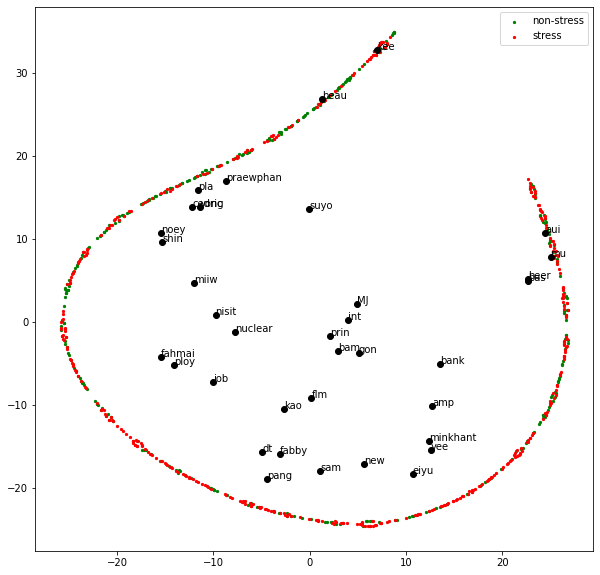

========== 2 ==========
['Fp1_Delta' 'F3_Delta']
X_ori.shape=(720, 2) y_ori.shape=(720,)
SVM: 0.7541666666666667 0.7444444444444445 0.03838965266968125
LR: 0.6777777777777778 0.6777777777777777 0.042491829279939865


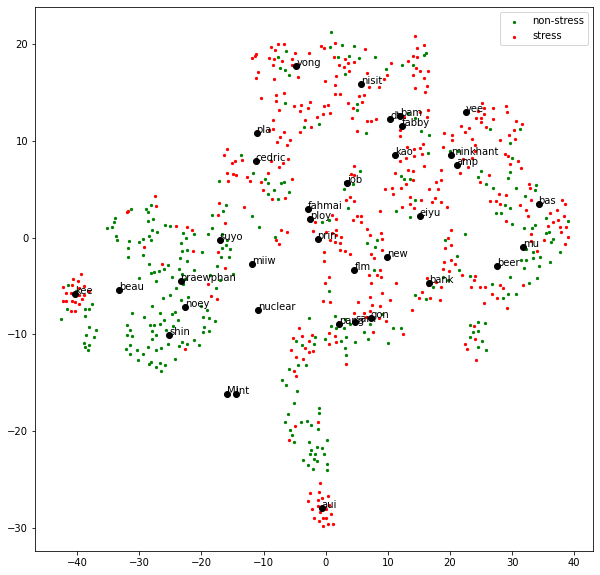

========== 3 ==========
['Fp1_Delta' 'F3_Delta' 'F4_Delta']
X_ori.shape=(720, 3) y_ori.shape=(720,)
SVM: 0.7819444444444444 0.7708333333333334 0.042241406460404286
LR: 0.6666666666666666 0.6666666666666667 0.0345830544388576


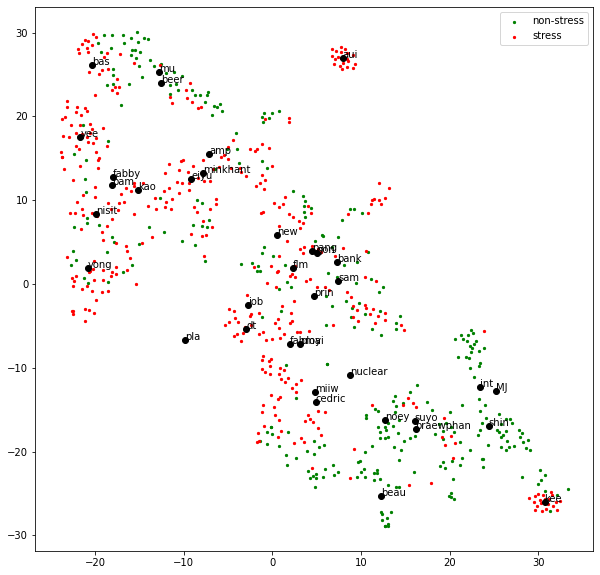

========== 4 ==========
['Fp1_Delta' 'F3_Delta' 'F4_Delta' 'C3_Delta']
X_ori.shape=(720, 4) y_ori.shape=(720,)
SVM: 0.8472222222222222 0.8236111111111111 0.05344967056914963
LR: 0.6805555555555556 0.6763888888888889 0.043055555555555534


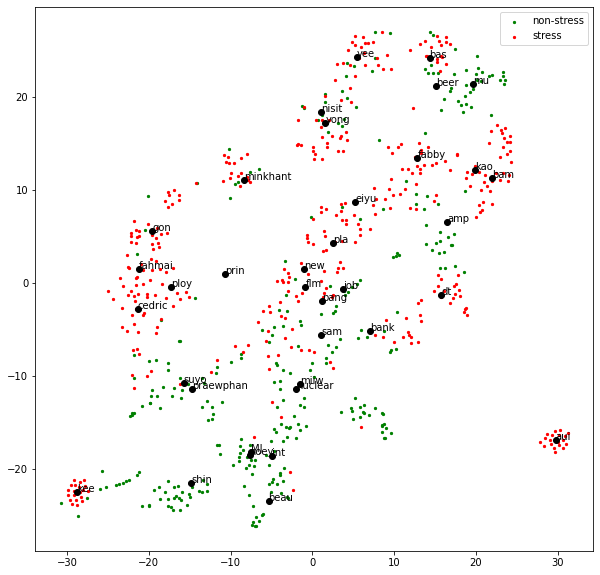

========== 5 ==========
['Fp1_Delta' 'F3_Delta' 'F4_Delta' 'C3_Delta' 'P4_Delta']
X_ori.shape=(720, 5) y_ori.shape=(720,)
SVM: 0.8888888888888888 0.8722222222222223 0.029658550700086963
LR: 0.7305555555555555 0.7222222222222222 0.06334307917217435


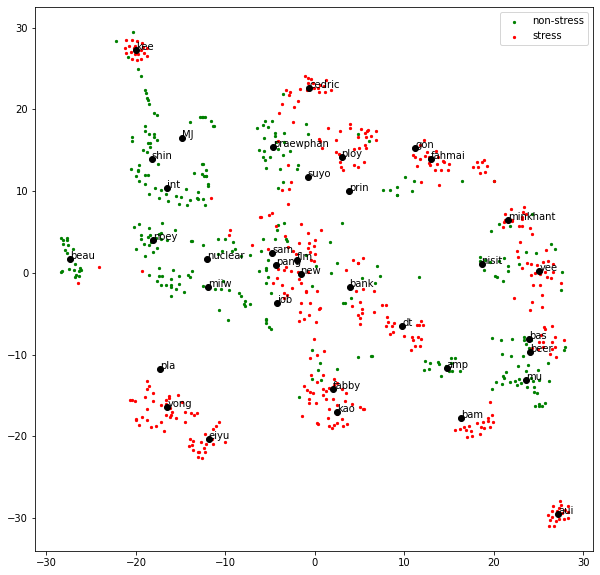

========== 6 ==========
['Fp1_Delta' 'F3_Delta' 'F4_Delta' 'C3_Delta' 'P4_Delta' 'F3_Theta']
X_ori.shape=(720, 6) y_ori.shape=(720,)
SVM: 0.8902777777777777 0.8736111111111111 0.030712978315966633
LR: 0.7277777777777777 0.7236111111111111 0.057079784966762546


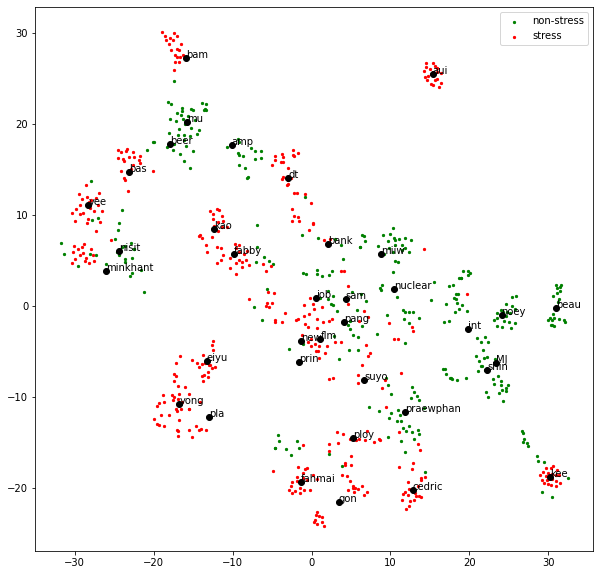

========== 7 ==========
['Fp1_Delta' 'F3_Delta' 'F4_Delta' 'C3_Delta' 'P4_Delta' 'F3_Theta'
 'C3_Theta']
X_ori.shape=(720, 7) y_ori.shape=(720,)
SVM: 0.9055555555555556 0.8875 0.04187448175467039
LR: 0.7277777777777777 0.7194444444444443 0.061111111111111116


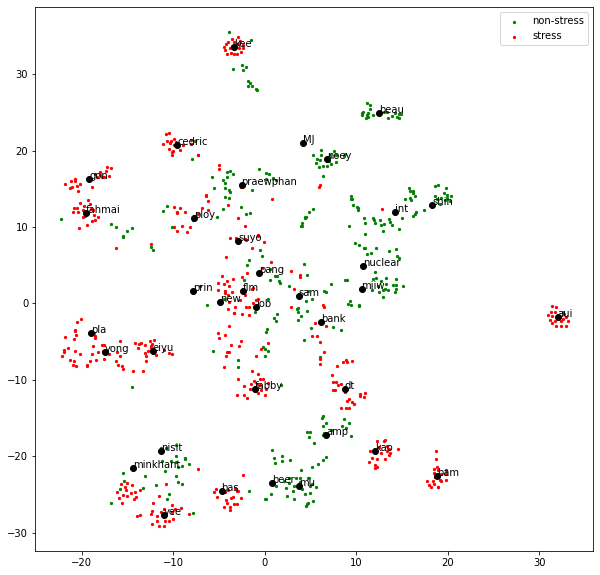

========== 8 ==========
['Fp1_Delta' 'F3_Delta' 'F4_Delta' 'C3_Delta' 'P4_Delta' 'F3_Theta'
 'C3_Theta' 'T4_Theta']
X_ori.shape=(720, 8) y_ori.shape=(720,)
SVM: 0.9375 0.9152777777777779 0.025192162704468123
LR: 0.7680555555555556 0.7555555555555555 0.03737117790853809


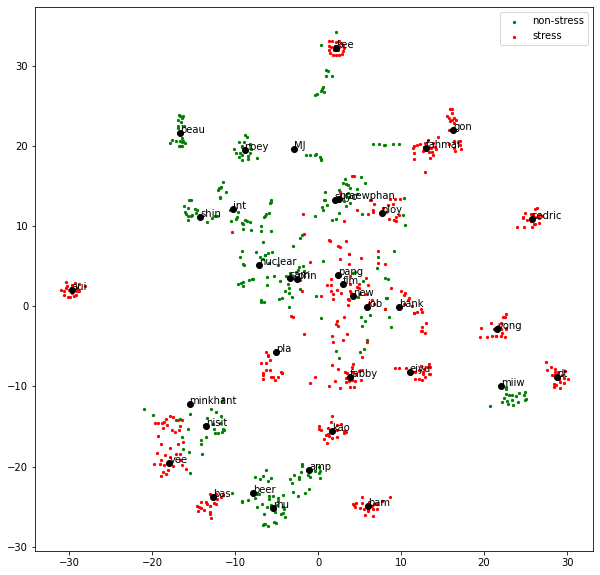

========== 9 ==========
['Fp1_Delta' 'F3_Delta' 'F4_Delta' 'C3_Delta' 'P4_Delta' 'F3_Theta'
 'C3_Theta' 'T4_Theta' 'P4_Theta']
X_ori.shape=(720, 9) y_ori.shape=(720,)
SVM: 0.9388888888888889 0.9152777777777776 0.03194444444444444
LR: 0.7666666666666667 0.7583333333333334 0.046976484792466


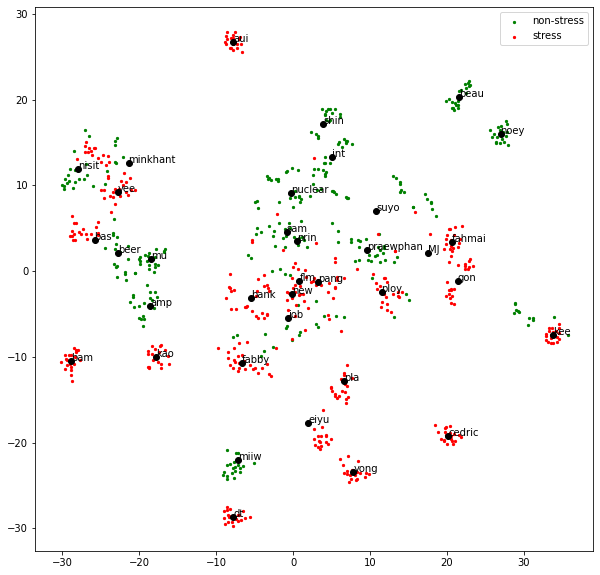

========== 10 ==========
['Fp1_Delta' 'F3_Delta' 'F4_Delta' 'C3_Delta' 'P4_Delta' 'F3_Theta'
 'C3_Theta' 'T4_Theta' 'P4_Theta' 'F3_Alpha']
X_ori.shape=(720, 10) y_ori.shape=(720,)
SVM: 0.9486111111111111 0.9347222222222223 0.02638888888888888
LR: 0.7833333333333333 0.7708333333333333 0.04358987451798671


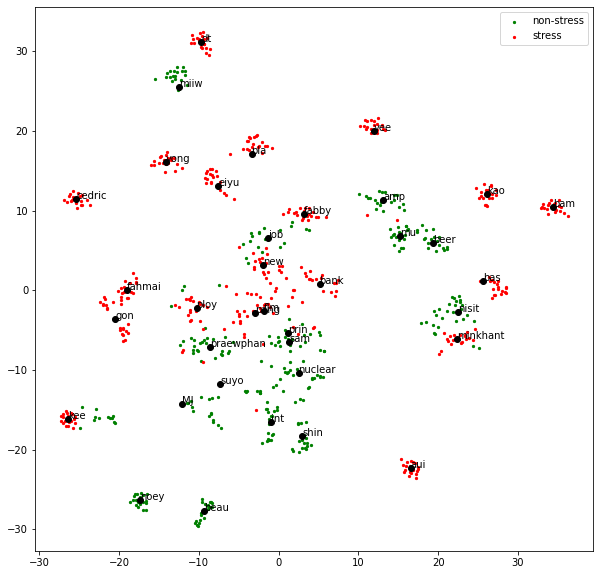

========== 11 ==========
['Fp1_Delta' 'F3_Delta' 'F4_Delta' 'C3_Delta' 'P4_Delta' 'F3_Theta'
 'C3_Theta' 'T4_Theta' 'P4_Theta' 'F3_Alpha' 'F4_Alpha']
X_ori.shape=(720, 11) y_ori.shape=(720,)
SVM: 0.9527777777777777 0.9291666666666666 0.03133476159077357
LR: 0.8013888888888889 0.7958333333333334 0.04813256514212071


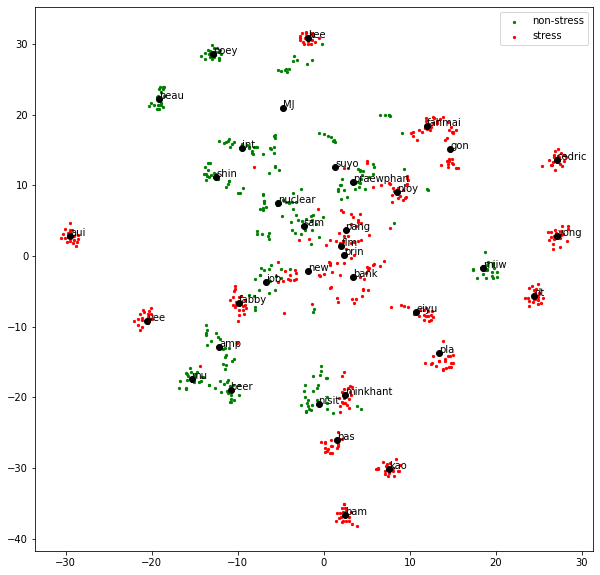

========== 12 ==========
['Fp1_Delta' 'F3_Delta' 'F4_Delta' 'C3_Delta' 'P4_Delta' 'F3_Theta'
 'C3_Theta' 'T4_Theta' 'P4_Theta' 'F3_Alpha' 'F4_Alpha' 'F7_Alpha']
X_ori.shape=(720, 12) y_ori.shape=(720,)
SVM: 0.95 0.9319444444444445 0.014500425706820202
LR: 0.7958333333333333 0.7916666666666666 0.042127085800286394


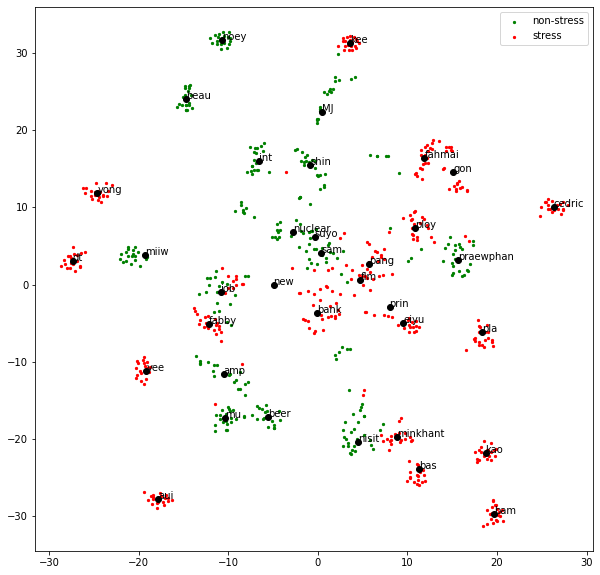

========== 13 ==========
['Fp1_Delta' 'F3_Delta' 'F4_Delta' 'C3_Delta' 'P4_Delta' 'F3_Theta'
 'C3_Theta' 'T4_Theta' 'P4_Theta' 'F3_Alpha' 'F4_Alpha' 'F7_Alpha'
 'T6_Alpha']
X_ori.shape=(720, 13) y_ori.shape=(720,)
SVM: 0.9569444444444445 0.9416666666666667 0.019444444444444448
LR: 0.8013888888888889 0.788888888888889 0.057534208825577714


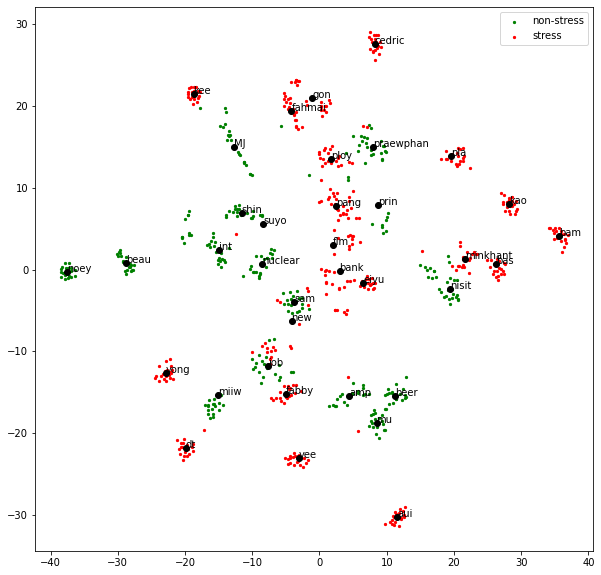

========== 14 ==========
['Fp1_Delta' 'F3_Delta' 'F4_Delta' 'C3_Delta' 'P4_Delta' 'F3_Theta'
 'C3_Theta' 'T4_Theta' 'P4_Theta' 'F3_Alpha' 'F4_Alpha' 'F7_Alpha'
 'T6_Alpha' 'P4_Alpha']
X_ori.shape=(720, 14) y_ori.shape=(720,)
SVM: 0.9736111111111111 0.9597222222222221 0.021916296997304876
LR: 0.7944444444444444 0.7847222222222222 0.02173954978124794


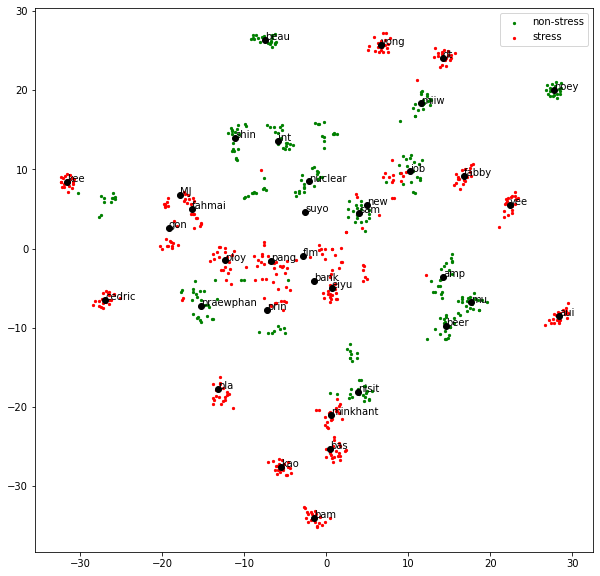

========== 15 ==========
['Fp1_Delta' 'F3_Delta' 'F4_Delta' 'C3_Delta' 'P4_Delta' 'F3_Theta'
 'C3_Theta' 'T4_Theta' 'P4_Theta' 'F3_Alpha' 'F4_Alpha' 'F7_Alpha'
 'T6_Alpha' 'P4_Alpha' 'F3_Beta']
X_ori.shape=(720, 15) y_ori.shape=(720,)
SVM: 0.975 0.9597222222222224 0.02667968432263688
LR: 0.7944444444444444 0.7861111111111112 0.035246048723470896


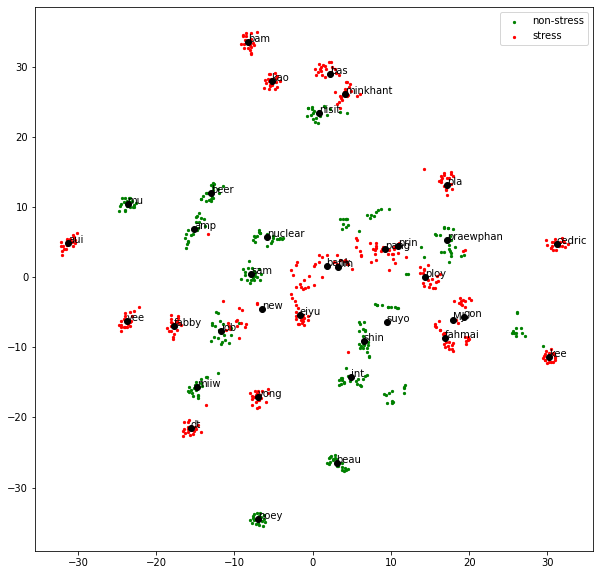

In [6]:
csv = pd.read_csv('export/15s_133features_filter_std.csv')
for i in range(1,15+1):
    print("="*10,i,"="*10)
    print(features[:i])
    X,y = getXY(csv.copy(), features=features[:i])
    model, acc, cross = train_model_SVM(X,y,do_print=False)
    print("SVM:", acc, cross.mean(), cross.std())

    model, acc, cross = train_model_LR(X,y,do_print=False)
    print("LR:",acc, cross.mean(), cross.std())

    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)
    fig,ax = plt.subplots(figsize = (10,10))
    cdict = {0: 'green', 1: 'red'}
    ldict = {0: 'non-stress', 1: 'stress'}
    for g in np.unique(y):
        ix = np.where(y == g)
        ax.scatter(X_embedded[ix,0], X_embedded[ix,1], c =cdict[g], label = ldict[g], s = 5)

    for name in csv['name'].unique():
        point = X_embedded[csv['name'] == name].mean(axis=0)
        ax.scatter(point[0],point[1], c='black')
        ax.text(point[0],point[1], s=name)
    ax.legend()
    plt.show()
    

# Use LR RANK

========== 1 ==========
['F3_Beta']
X_ori.shape=(720, 1) y_ori.shape=(720,)
SVM: 0.5986111111111111 0.586111111111111 0.06655082528172744
LR: 0.5541666666666667 0.5527777777777778 0.0496126974985882


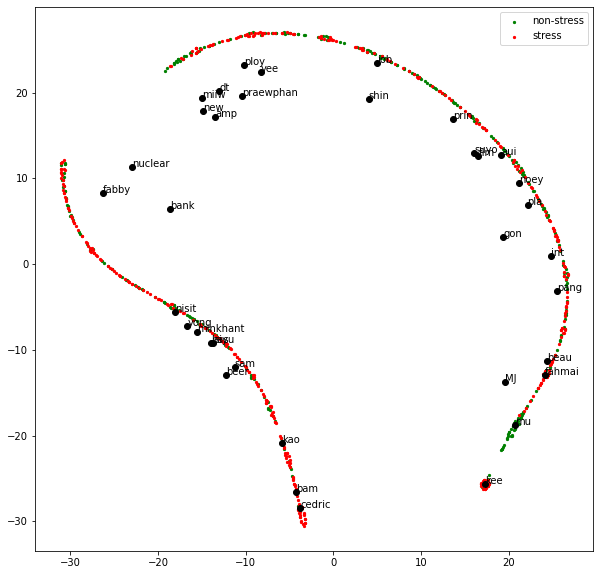

========== 2 ==========
['F3_Beta' 'P4_Delta']
X_ori.shape=(720, 2) y_ori.shape=(720,)
SVM: 0.6402777777777777 0.6222222222222221 0.03154949081000152
LR: 0.5722222222222222 0.5777777777777778 0.0393817968854384


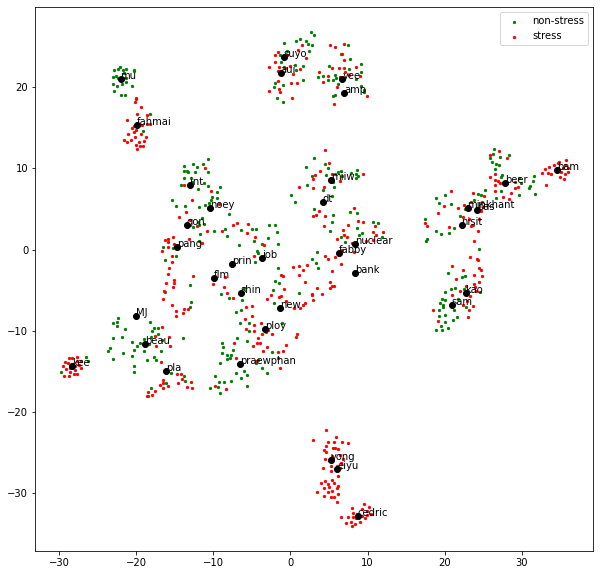

========== 3 ==========
['F3_Beta' 'P4_Delta' 'beta_frontal']
X_ori.shape=(720, 3) y_ori.shape=(720,)
SVM: 0.7569444444444444 0.7444444444444445 0.029265704869035385
LR: 0.625 0.6236111111111111 0.03007834420514959


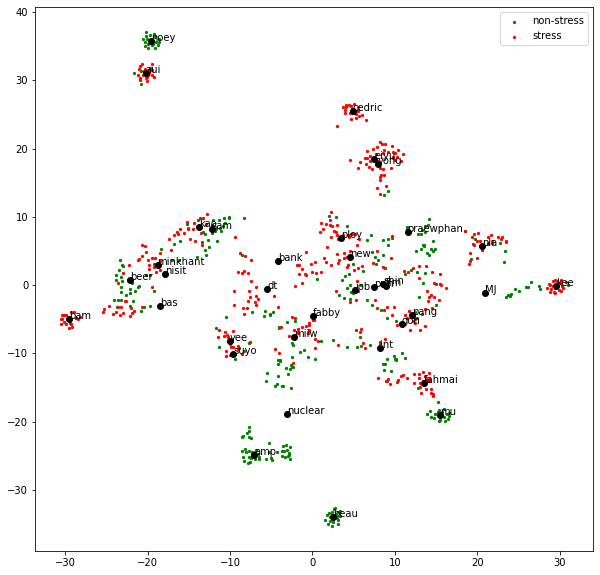

========== 4 ==========
['F3_Beta' 'P4_Delta' 'beta_frontal' 'C3_relative_gamma']
X_ori.shape=(720, 4) y_ori.shape=(720,)
SVM: 0.8736111111111111 0.851388888888889 0.03831420617814922
LR: 0.6458333333333334 0.6472222222222221 0.025760051376376943


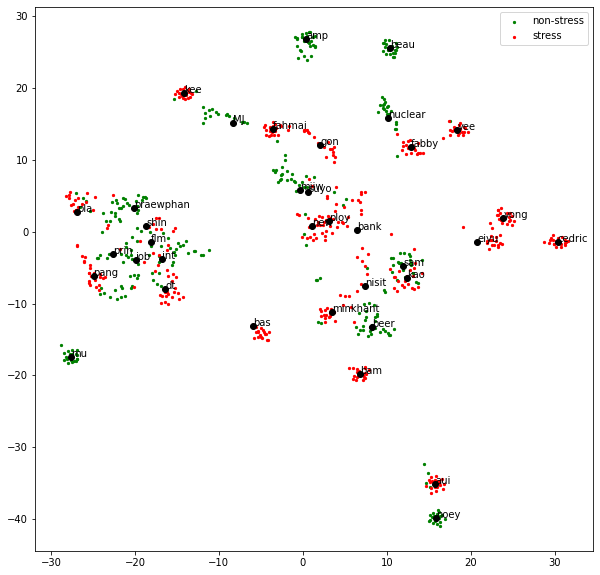

========== 5 ==========
['F3_Beta' 'P4_Delta' 'beta_frontal' 'C3_relative_gamma' 'F3_Delta']
X_ori.shape=(720, 5) y_ori.shape=(720,)
SVM: 0.9055555555555556 0.8791666666666667 0.04027777777777777
LR: 0.7277777777777777 0.726388888888889 0.05161362271128346


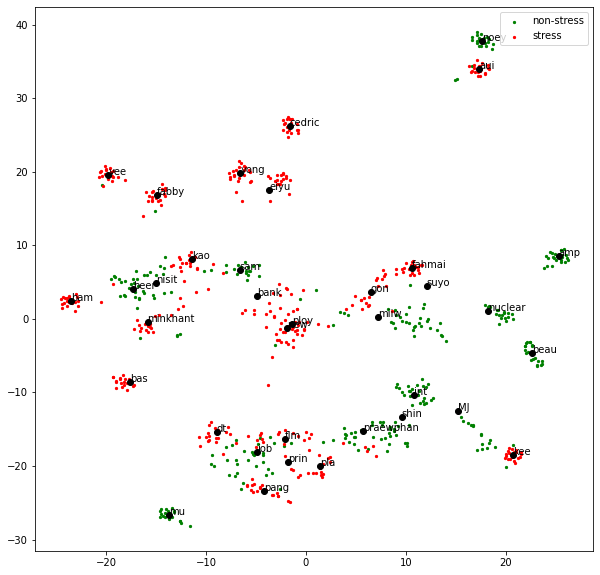

========== 6 ==========
['F3_Beta' 'P4_Delta' 'beta_frontal' 'C3_relative_gamma' 'F3_Delta'
 'F4_Delta']
X_ori.shape=(720, 6) y_ori.shape=(720,)
SVM: 0.9194444444444444 0.9041666666666666 0.04233264070591158
LR: 0.7402777777777778 0.7402777777777777 0.03831420617814923


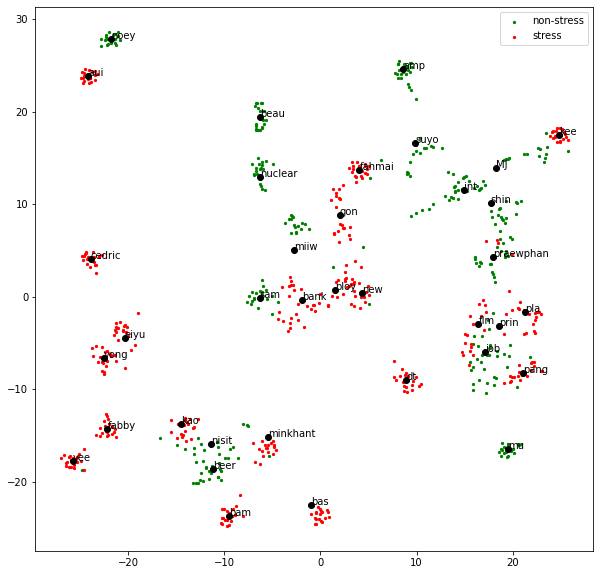

========== 7 ==========
['F3_Beta' 'P4_Delta' 'beta_frontal' 'C3_relative_gamma' 'F3_Delta'
 'F4_Delta' 'T4_Theta']
X_ori.shape=(720, 7) y_ori.shape=(720,)
SVM: 0.9263888888888889 0.9083333333333334 0.03469443332443554
LR: 0.7486111111111111 0.7333333333333333 0.04015786748555821


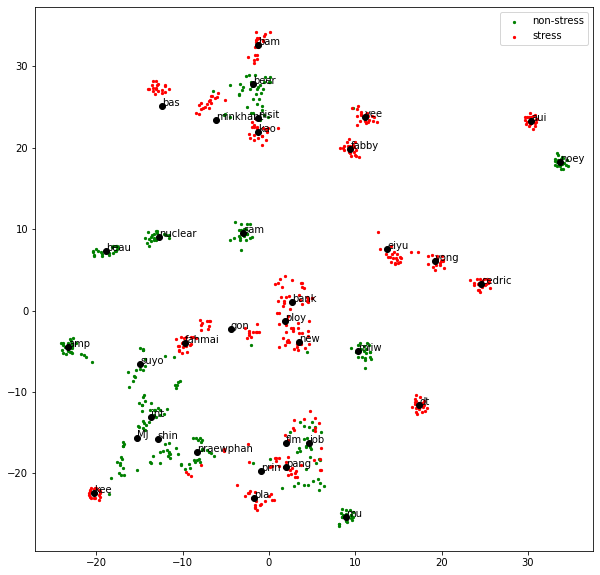

========== 8 ==========
['F3_Beta' 'P4_Delta' 'beta_frontal' 'C3_relative_gamma' 'F3_Delta'
 'F4_Delta' 'T4_Theta' 'F3_Low_beta']
X_ori.shape=(720, 8) y_ori.shape=(720,)
SVM: 0.9388888888888889 0.9236111111111113 0.027251967875484145
LR: 0.7708333333333334 0.7597222222222222 0.0527229247113953


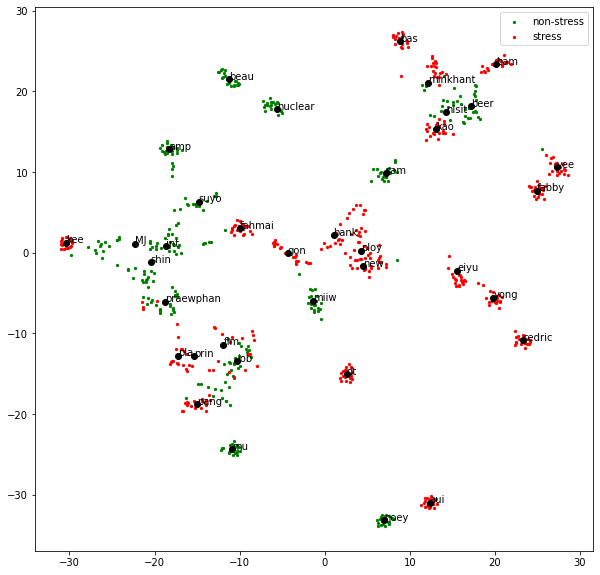

========== 9 ==========
['F3_Beta' 'P4_Delta' 'beta_frontal' 'C3_relative_gamma' 'F3_Delta'
 'F4_Delta' 'T4_Theta' 'F3_Low_beta' 'P4_Alpha']
X_ori.shape=(720, 9) y_ori.shape=(720,)
SVM: 0.9722222222222222 0.9597222222222221 0.02277947148174546
LR: 0.8430555555555556 0.8291666666666668 0.02711002957769881


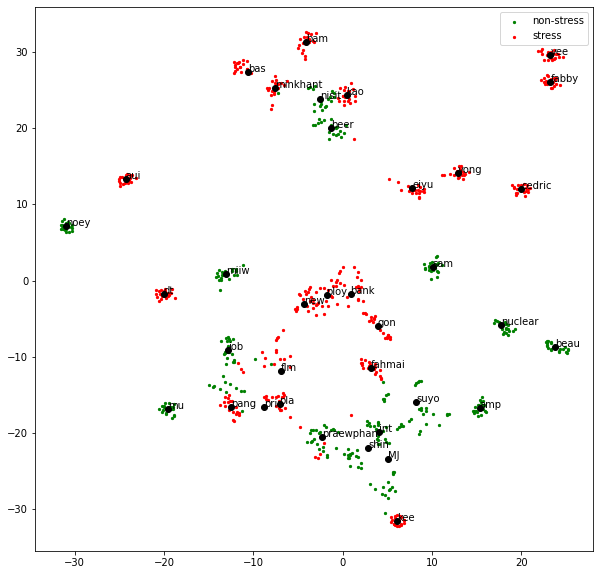

========== 10 ==========
['F3_Beta' 'P4_Delta' 'beta_frontal' 'C3_relative_gamma' 'F3_Delta'
 'F4_Delta' 'T4_Theta' 'F3_Low_beta' 'P4_Alpha' 'F7_Alpha']
X_ori.shape=(720, 10) y_ori.shape=(720,)
SVM: 0.9763888888888889 0.9638888888888889 0.014163943093313307
LR: 0.8388888888888889 0.8388888888888889 0.031180478223116186


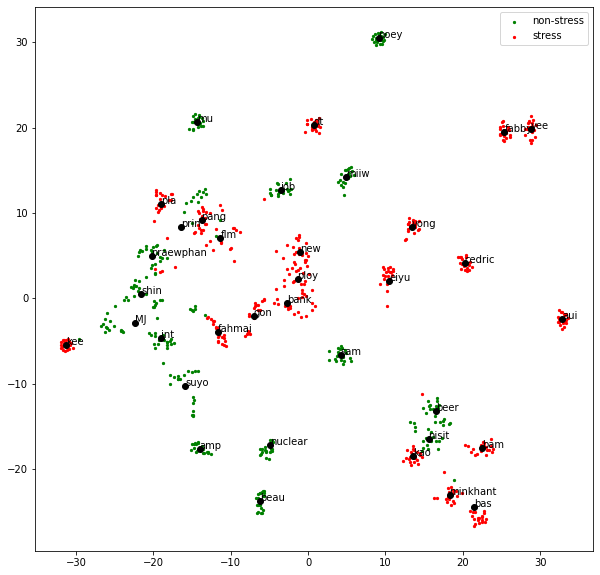

========== 11 ==========
['F3_Beta' 'P4_Delta' 'beta_frontal' 'C3_relative_gamma' 'F3_Delta'
 'F4_Delta' 'T4_Theta' 'F3_Low_beta' 'P4_Alpha' 'F7_Alpha' 'F4_Alpha']
X_ori.shape=(720, 11) y_ori.shape=(720,)
SVM: 0.9722222222222222 0.9625 0.02711002957769882
LR: 0.8555555555555555 0.8458333333333334 0.021017702708918843


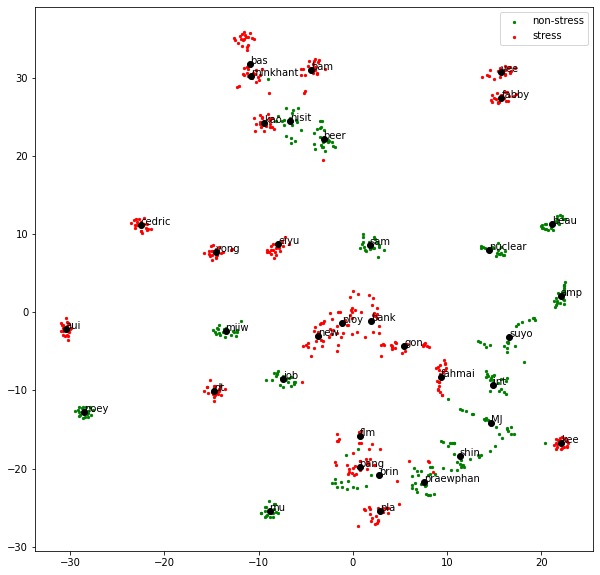

========== 12 ==========
['F3_Beta' 'P4_Delta' 'beta_frontal' 'C3_relative_gamma' 'F3_Delta'
 'F4_Delta' 'T4_Theta' 'F3_Low_beta' 'P4_Alpha' 'F7_Alpha' 'F4_Alpha'
 'F3_Alpha']
X_ori.shape=(720, 12) y_ori.shape=(720,)
SVM: 0.9708333333333333 0.9597222222222221 0.02361111111111112
LR: 0.8652777777777778 0.8472222222222221 0.043479099562495904


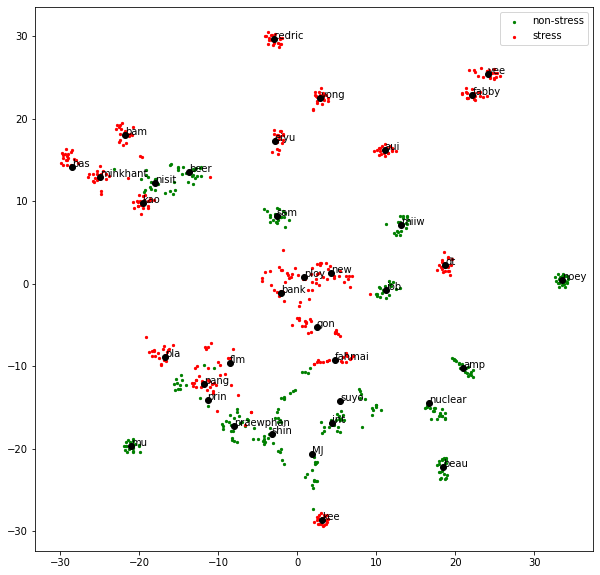

========== 13 ==========
['F3_Beta' 'P4_Delta' 'beta_frontal' 'C3_relative_gamma' 'F3_Delta'
 'F4_Delta' 'T4_Theta' 'F3_Low_beta' 'P4_Alpha' 'F7_Alpha' 'F4_Alpha'
 'F3_Alpha' 'Fp1_Delta']
X_ori.shape=(720, 13) y_ori.shape=(720,)
SVM: 0.9722222222222222 0.961111111111111 0.026205503144601707
LR: 0.8569444444444444 0.8486111111111111 0.03254270698294438


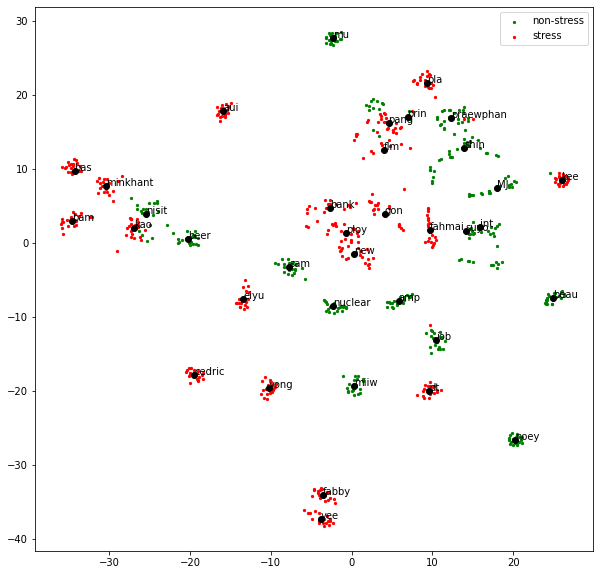

========== 14 ==========
['F3_Beta' 'P4_Delta' 'beta_frontal' 'C3_relative_gamma' 'F3_Delta'
 'F4_Delta' 'T4_Theta' 'F3_Low_beta' 'P4_Alpha' 'F7_Alpha' 'F4_Alpha'
 'F3_Alpha' 'Fp1_Delta' 'T6_Alpha']
X_ori.shape=(720, 14) y_ori.shape=(720,)
SVM: 0.975 0.9583333333333334 0.015214515486254621
LR: 0.8652777777777778 0.8583333333333332 0.02620550314460168


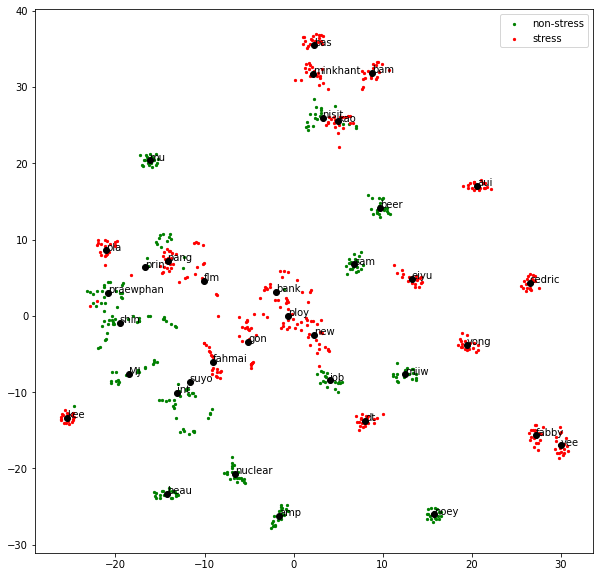

========== 15 ==========
['F3_Beta' 'P4_Delta' 'beta_frontal' 'C3_relative_gamma' 'F3_Delta'
 'F4_Delta' 'T4_Theta' 'F3_Low_beta' 'P4_Alpha' 'F7_Alpha' 'F4_Alpha'
 'F3_Alpha' 'Fp1_Delta' 'T6_Alpha' 'F3_Gamma']
X_ori.shape=(720, 15) y_ori.shape=(720,)
SVM: 0.9763888888888889 0.9569444444444445 0.018055555555555557
LR: 0.8625 0.8527777777777779 0.03413390479845696


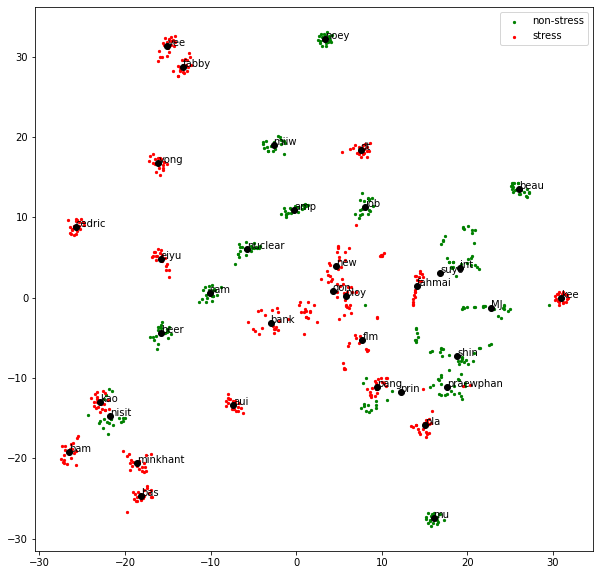

In [9]:
csv = pd.read_csv('export/15s_133features_filter_std.csv')
rank = [14,4,24,20,1,2,7,18,13,11,10,9,0,12,15]
for i in range(1,15+1):
    print("="*10,i,"="*10)
    print(features[rank[:i]])
    X,y = getXY(csv.copy(), features=features[rank[:i]])
    model, acc, cross = train_model_SVM(X,y,do_print=False)
    print("SVM:", acc, cross.mean(), cross.std())

    model, acc, cross = train_model_LR(X,y,do_print=False)
    print("LR:",acc, cross.mean(), cross.std())

    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)
    fig,ax = plt.subplots(figsize = (10,10))
    cdict = {0: 'green', 1: 'red'}
    ldict = {0: 'non-stress', 1: 'stress'}
    for g in np.unique(y):
        ix = np.where(y == g)
        ax.scatter(X_embedded[ix,0], X_embedded[ix,1], c =cdict[g], label = ldict[g], s = 5)

    for name in csv['name'].unique():
        point = X_embedded[csv['name'] == name].mean(axis=0)
        ax.scatter(point[0],point[1], c='black')
        ax.text(point[0],point[1], s=name)
    ax.legend()
    plt.show()
    